In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os
import os.path
import scipy 
import networkx as nx
#from math import pow
import math
import cmath
from numpy.polynomial.polynomial import polyfit

#Carica librerie python e libreria funzioni.py

%run function.py

# UTILIZZO LA DEFINIZIONE DI ERIKSON DI SETTORI A PARTIRE DAI NOSTRI PROXY

In [2]:
unified_p5ter=unify_replicas_tot('P5ter3', p5ter3_index)
unified_p5ori=unify_replicas_tot('P5ori3', p5ori3_index)
unified_p5ori_prova=unify_replicas_tot('P5ori3', p5ori3_index[:-1])


unified_p1ori=unify_replicas_tot('P1ori3', p1ori3_index)
unified_p1longori=unify_replicas_tot('P1longori3', p1longori3_index)
unified_p1longori_prova=unify_replicas_tot('P1longori3', p1longori3_index[0:3:2])


In [3]:
p5ter_fluo_mean=bin_mean(unified_p5ter.tTrans,(unified_p5ter.Itot/unified_p5ter.V),4,20,-300,400,interval='custom')
p5ori_fluo_mean=bin_mean(unified_p5ori.tTrans,(unified_p5ori.Itot/unified_p5ori.V),4,20,-300,400,interval='custom')
p5ori_fluo_mean_prova=bin_mean(unified_p5ori_prova.tTrans,(unified_p5ori_prova.Itot/unified_p5ori_prova.V),4,20,-300,400,interval='custom')


p1ori_fluo_mean=bin_mean(unified_p1ori.tTrans,(unified_p1ori.Itot/unified_p1ori.V),4,20,-300,400,interval='custom')
p1longori_fluo_mean=bin_mean(unified_p1longori.tTrans,(unified_p1longori.Itot/unified_p1longori.V),4,20,-300,400,interval='custom')
p1longori_fluo_mean_prova=bin_mean(unified_p1longori_prova.tTrans,(unified_p1longori_prova.Itot/unified_p1longori_prova.V),4,20,-300,400,interval='custom')


I GROWTH RATE GLI HO GIÀ CALCOLATI IN PROXY_PLOT 

In [4]:
p1ori_growth_r1=pd.read_csv(growth_path+'p1ori_r1.csv',index_col=0)
p1ori_growth_r2=pd.read_csv(growth_path+'p1ori_r2.csv',index_col=0)

p5ter_growth_r1=pd.read_csv(growth_path+'p5ter_r1.csv',index_col=0)
p5ter_growth_r2=pd.read_csv(growth_path+'p5ter_r2.csv',index_col=0)

p1longori_growth_r1=pd.read_csv(growth_path+'p1longori_r1.csv',index_col=0)
p1longori_growth_r2=pd.read_csv(growth_path+'p1longori_r2.csv',index_col=0)
p1longori_growth_r3=pd.read_csv(growth_path+'p1longori_r3.csv',index_col=0)

p1longori_growth_u=pd.concat([p1longori_growth_r1,p1longori_growth_r2,p1longori_growth_r3],ignore_index= True)
p1ori_growth_u=pd.concat([p1ori_growth_r1,p1ori_growth_r2],ignore_index= True)
p5ter_growth_u=pd.concat([p5ter_growth_r1,p5ter_growth_r2], ignore_index=True)

In [5]:
growth_mean_p5ter_u=bin_mean(p5ter_growth_u.tTrans,(p5ter_growth_u.der/p5ter_growth_u.V),4,20,-300,400,interval='custom')

In [6]:
growth_mean_p1ori_u=bin_mean(p1ori_growth_u.tTrans,(p1ori_growth_u.der/p1ori_growth_u.V),4,20,-300,400,interval='custom')

In [7]:
growth_mean_p1longori_u=bin_mean(p1longori_growth_u.tTrans,(p1longori_growth_u.der/p1longori_growth_u.V),4,20,-300,400,interval='custom')

# faccio il calcolo dei settori con varie combinazioni di proxies


In [8]:
#constant values p1ori p1long con p5ter
#fluo_params_5t1o,pcov5t1o=scipy.optimize.curve_fit(fit_func_fluo, p5ter_fluo_mean, p1ori_fluo_mean ) 
#fluo_params_5t1lo,pcov5t1lo=scipy.optimize.curve_fit(fit_func_fluo, p5ter_fluo_mean, p1longori_fluo_mean ) 
#constant values p1ori p1long con p5ori
#fluo_params_5o1o,pcov5o1o=scipy.optimize.curve_fit(fit_func_fluo, p5ori_fluo_mean, p1ori_fluo_mean ) 
#fluo_params_5o1lo,pcov5o1lo=scipy.optimize.curve_fit(fit_func_fluo, p5ori_fluo_mean, p1longori_fluo_mean ) 

In [9]:
#constant values p1ori p1long con p5ter
#fluo_params_5t1lo_p,pcov5t1lo_p=scipy.optimize.curve_fit(fit_func_fluo, p5ter_fluo_mean, p1longori_fluo_mean_prova ) 
#constant values p1ori p1long con p5ori
#fluo_params_5o1o_p,pcov5o1o_p=scipy.optimize.curve_fit(fit_func_fluo, p5ori_fluo_mean_prova, p1ori_fluo_mean ) 
#fluo_params_5o1lo_p,pcov5o1lo_p=scipy.optimize.curve_fit(fit_func_fluo, p5ori_fluo_mean_prova, p1longori_fluo_mean ) 

In [10]:
#parametro di conversione calcolato con erikson sullo steady iniziale
#fluo_params_5t1lo1=(0.049+np.array(growth_mean_p1longori_u[25:75]).mean()/0.183)*(1/np.array(p1longori_fluo_mean[25:75]).mean())
#fluo_params_5t1lo1

In [11]:
#parametro di conversione calcolato con erikson sullo steady finale
#fluo_params_5t1lo2=(0.049+np.array(growth_mean_p1longori_u[125:175]).mean()/0.183)*(1/np.array(p1longori_fluo_mean[125:175]).mean())
#fluo_params_5t1lo2

In [12]:
#parametro di conversione calcolato con erikson sullo steady iniziale
fluo_params1_phi_r=(0.049+np.array(growth_mean_p5ter_u[25:75]).mean()/0.183)*(1/np.array(p1longori_fluo_mean[25:75]).mean())
fluo_params1_phi_r

1.4968415508844515e-07

In [13]:
#parametro di conversione calcolato con erikson sullo steady finale
fluo_params2_phi_r=(0.049+np.array(growth_mean_p5ter_u[125:175]).mean()/0.183)*(1/np.array(p1longori_fluo_mean[125:175]).mean())
fluo_params2_phi_r

1.4902398836970562e-07

In [14]:
#parametro di conversione calcolato con erikson sullo steady iniziale phi_p
fluo_params1_phi_p=(0.55-0.049-np.array(growth_mean_p5ter_u[25:75]).mean()/0.183)*(1/np.array(p5ter_fluo_mean[25:75]).mean())
fluo_params1_phi_p

2.3704893933655836e-06

In [15]:
#parametro di conversione calcolato con erikson sullo steady finale
fluo_params2_phi_p=(0.55-0.049-np.array(growth_mean_p5ter_u[125:175]).mean()/0.183)*(1/np.array(p5ter_fluo_mean[125:175]).mean())
fluo_params2_phi_p

2.5578334602469047e-06

i due valori che si trovano sono abbastanza simili, va bene

In [16]:
phi_r=fluo_params1_phi_r*np.array(p1longori_fluo_mean)

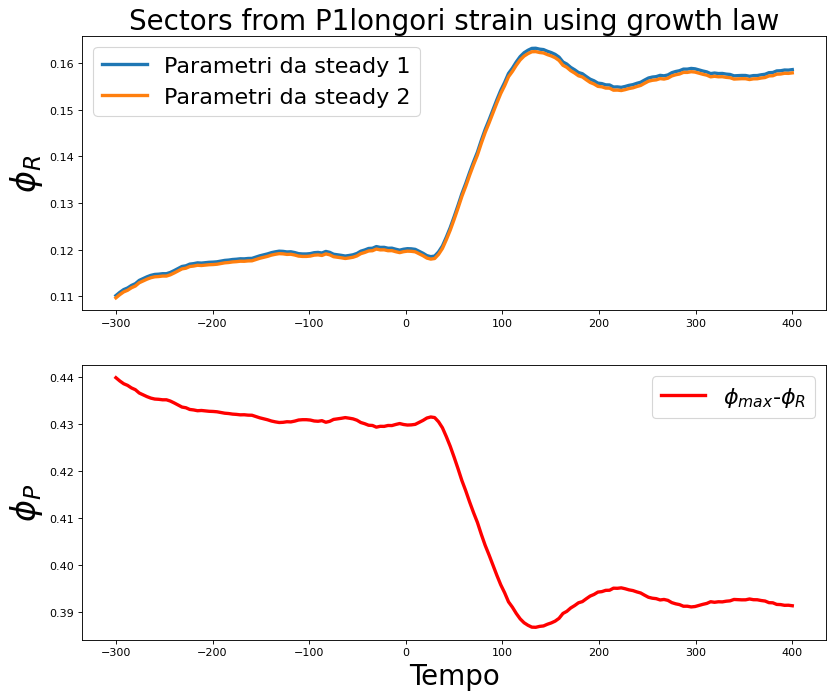

In [17]:
#plot correto p5ter repliche unificate

fig=plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax.set_title('Sectors from P1longori strain using growth law', fontsize=25)


ax2.set_xlabel("Tempo", fontsize=25)
ax.set_ylabel('$\phi_R$', fontsize=30)
ax2.set_ylabel("$\phi_P$", fontsize=30)

ax.plot(np.linspace(-300,400,len(p1longori_fluo_mean)),fluo_params1_phi_r*np.array(p1longori_fluo_mean), '-',markersize=4, linewidth=3, label= 'Parametri da steady 1')
ax.plot(np.linspace(-300,400,len(p1longori_fluo_mean)),fluo_params2_phi_r*np.array(p1longori_fluo_mean), '-',markersize=4, linewidth=3, label= 'Parametri da steady 2')

ax2.plot(np.linspace(-300,400,len(p1longori_fluo_mean)),0.55-(fluo_params1_phi_r*np.array(p1longori_fluo_mean)), 'r-',markersize=4, linewidth=3, label= '$\phi_{max}$-$\phi_R$')
ax.legend(fontsize=20)
ax2.legend(fontsize=20)

#ax.legend(fontsize=15, title='legend',title_fontsize=15)

plt.savefig('/home/valerio/tesi/data_managment/sector_phi_r_newproxy.pdf')

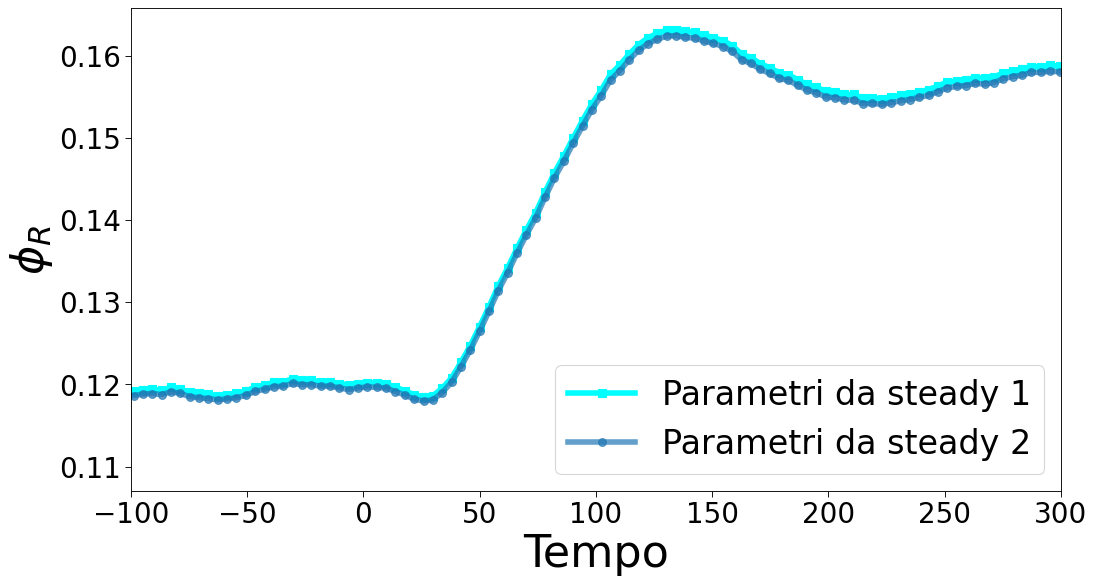

In [18]:
#plot correto p5ter repliche unificate

fig=plt.figure(num=None, figsize=(15,8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

#ax.set_title('R sector from P1longori strain using growth law', fontsize=25)

ax.tick_params(which='major', length=5, labelsize=25)
ax.set_xlim(-100,300)

ax.set_xlabel("Tempo", fontsize=40)
ax.set_ylabel('$\phi_R$', fontsize=40)

ax.plot(np.linspace(-300,400,len(p1longori_fluo_mean)),fluo_params1_phi_r*np.array(p1longori_fluo_mean), '-s',color='cyan',markersize=7, linewidth=5, label= 'Parametri da steady 1')
ax.plot(np.linspace(-300,400,len(p1longori_fluo_mean)),fluo_params2_phi_r*np.array(p1longori_fluo_mean), '-o',markersize=7, linewidth=5,alpha=0.7, label= 'Parametri da steady 2')

ax.legend(fontsize=30)

#ax.legend(fontsize=15, title='legend',title_fontsize=15)

plt.savefig('/home/valerio/tesi/data_managment/sector_phi_r_newproxy2.pdf')

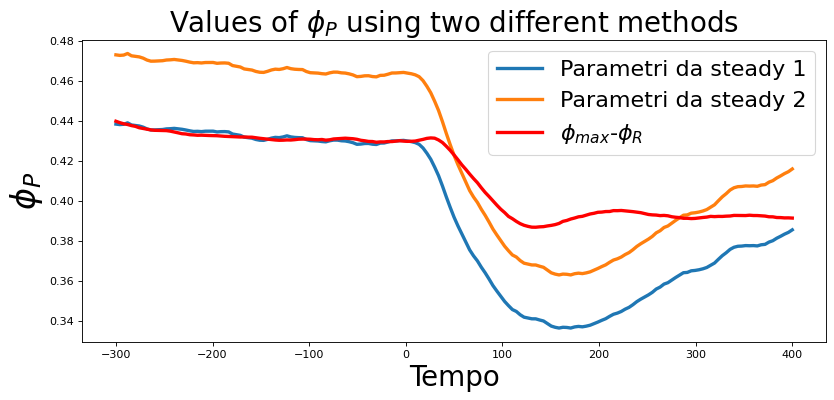

In [19]:
#plot correto p5ter repliche unificate

fig=plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.set_title('Values of $\phi_P$ using two different methods', fontsize=25)
ax.set_xlabel("Tempo", fontsize=25)
ax.set_ylabel('$\phi_P$', fontsize=30)

ax.plot(np.linspace(-300,400,len(p1longori_fluo_mean)),(fluo_params1_phi_p*np.array(p5ter_fluo_mean)), '-',markersize=4, linewidth=3, label= 'Parametri da steady 1')
ax.plot(np.linspace(-300,400,len(p1longori_fluo_mean)),(fluo_params2_phi_p*np.array(p5ter_fluo_mean)), '-',markersize=4, linewidth=3, label= 'Parametri da steady 2')
ax.plot(np.linspace(-300,400,len(p1longori_fluo_mean)),0.55-(fluo_params1_phi_r*np.array(p1longori_fluo_mean)), 'r-',markersize=4, linewidth=3, label= '$\phi_{max}$-$\phi_R$')

#ax.plot(np.linspace(-300,400,len(p1longori_fluo_mean)),(fluo_params_phi_p2*np.array(p5ter_fluo_mean))+(fluo_params_5t1lo1*np.array(p1longori_fluo_mean)), '-',markersize=4, linewidth=3, label= 'growth laws')

ax.legend(fontsize=20)
plt.savefig('/home/valerio/tesi/data_managment/sector_phi_p_newproxy.pdf')

In [20]:
erikson_phi_r=pd.read_csv('/home/valerio/tesi/erikson_phi_lambda.csv')
fit_lin=scipy.stats.linregress(erikson_phi_r.growth_rate, erikson_phi_r.phi_r)

In [21]:
steady_phi=[fluo_params1_phi_r*np.array(p1longori_fluo_mean[25:75]).mean(),fluo_params1_phi_r*np.array(p1longori_fluo_mean[125:175]).mean()]
steady_growth=[np.array(growth_mean_p5ter_u[25:75]).mean(),np.array(growth_mean_p5ter_u[125:175]).mean()]


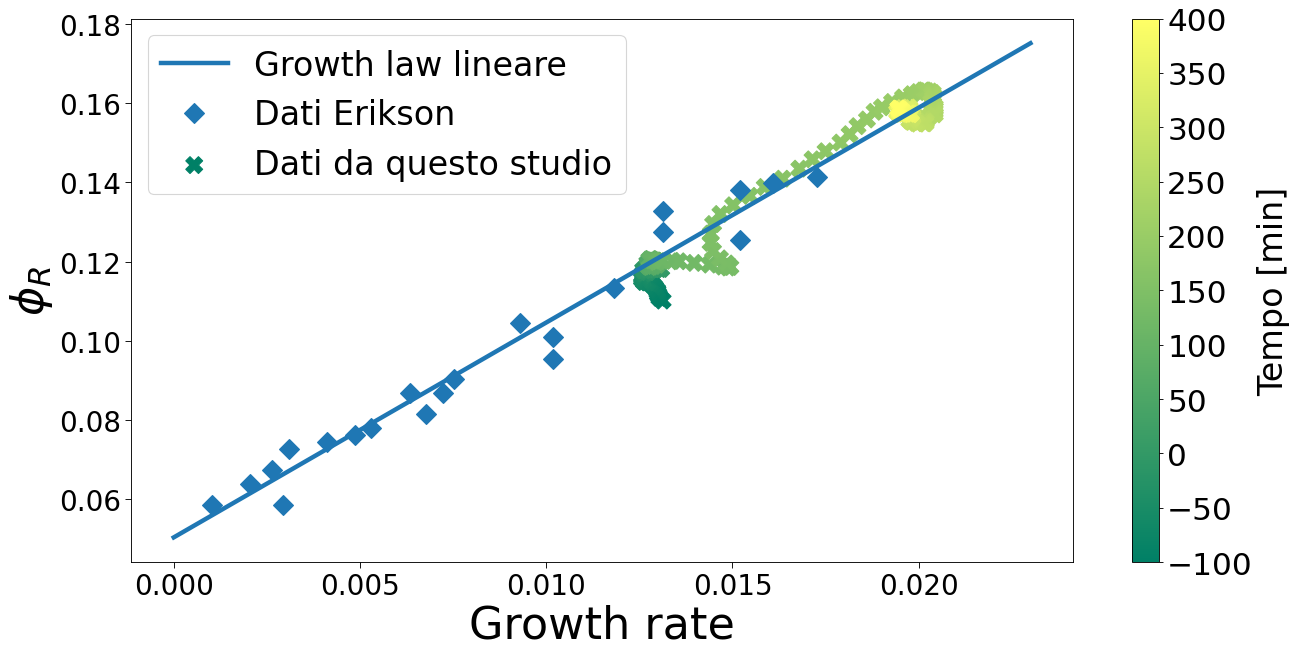

In [22]:
#plot correto p5ter repliche unificate

fig=plt.figure(num=None, figsize=(19, 9), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,1,1)

ax1.tick_params(which='major', length=5, labelsize=25)

#ax1.set_title('Rappresentazione growth law',fontsize=40)

ax1.set_xlabel("Growth rate", fontsize=40)
ax1.set_ylabel('$\phi_R$', fontsize=40)


sc=ax1.scatter(growth_mean_p5ter_u, fluo_params1_phi_r*np.array(p1longori_fluo_mean), c=np.linspace(-100,400,175),cmap='summer',marker= 'X', s=230, label='Dati da questo studio')
#ax1.plot(steady_growth,steady_phi, '--',color='grey', linewidth=5, label='growth law')
ax1.plot(np.linspace(0,0.023,10),np.linspace(0,0.023,10)*fit_lin[0]+fit_lin[1], linewidth=4, label='Growth law lineare')
ax1.plot(erikson_phi_r.growth_rate, erikson_phi_r.phi_r, 'D',color='tab:blue', markersize=13, label='Dati Erikson')

cb=plt.colorbar(sc,ax=ax1, ticks=np.linspace(-100,400,11), label='time')

cb.set_label(label='Tempo [min]', size=30)
cb.ax.tick_params(labelsize=28)

ax1.legend(fontsize=30,title_fontsize=30)
plt.savefig('/home/valerio/tesi/data_managment/growth_laws.pdf')

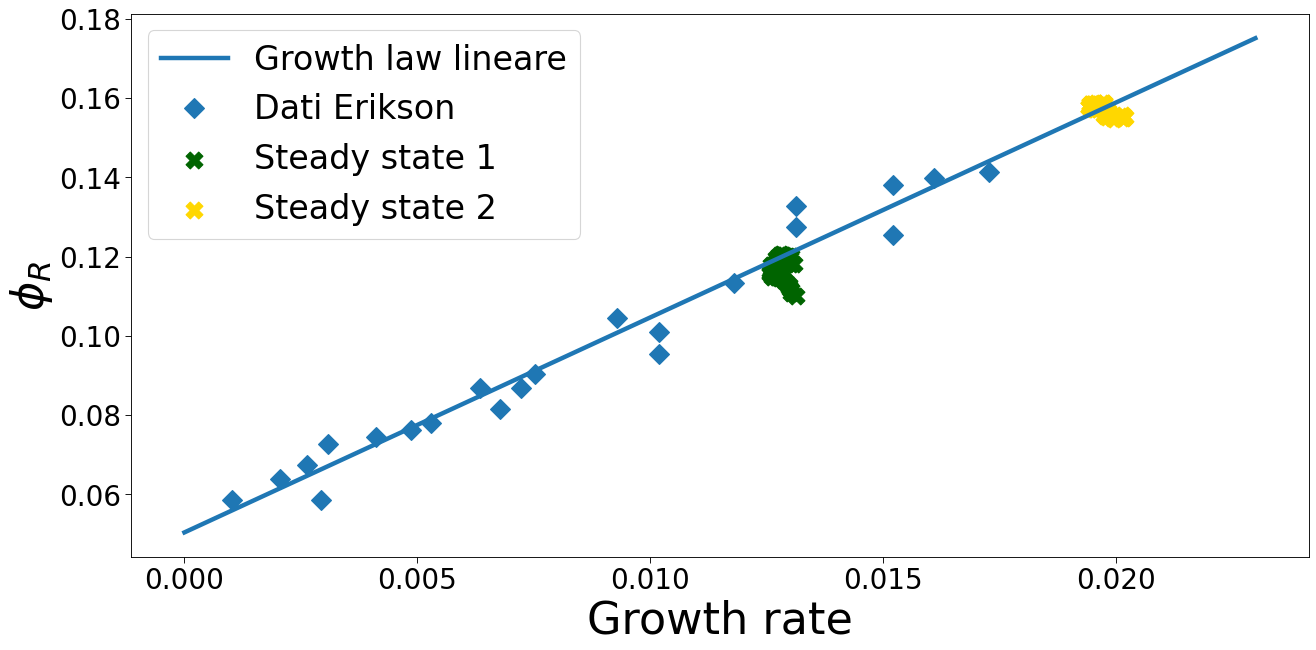

In [23]:
#plot correto p5ter repliche unificate

fig=plt.figure(num=None, figsize=(19, 9), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,1,1)

ax1.tick_params(which='major', length=5, labelsize=25)

#ax1.set_title('Rappresentazione growth law',fontsize=40)

ax1.set_xlabel("Growth rate", fontsize=40)
ax1.set_ylabel('$\phi_R$', fontsize=40)


sc=ax1.scatter(growth_mean_p5ter_u[:75], fluo_params1_phi_r*np.array(p1longori_fluo_mean)[:75], c='darkgreen',cmap='summer',marker= 'X', s=230, label='Steady state 1')
sc=ax1.scatter(growth_mean_p5ter_u[125:], fluo_params1_phi_r*np.array(p1longori_fluo_mean)[125:], c='gold',cmap='summer',marker= 'X', s=230, label='Steady state 2')

#ax1.plot(steady_growth,steady_phi, '--',color='grey', linewidth=5, label='growth law')
ax1.plot(np.linspace(0,0.023,10),np.linspace(0,0.023,10)*fit_lin[0]+fit_lin[1], linewidth=4, label='Growth law lineare')
ax1.plot(erikson_phi_r.growth_rate, erikson_phi_r.phi_r, 'D',color='tab:blue', markersize=13, label='Dati Erikson')

#cb=plt.colorbar(sc,ax=ax1, ticks=np.linspace(-300,400,15), label='time')

cb.set_label(label='Tempo [min]', size=30)
cb.ax.tick_params(labelsize=28)

ax1.legend(fontsize=30,title_fontsize=30)
plt.savefig('/home/valerio/tesi/data_managment/growth_laws_steady.pdf')

In [25]:
#il coefficente angolare della retta rossa é maggiore di 1 quindi phi_r cresce più in fretta in proporzione 
#rispetto a lambda, per questo ho sigma steady2 che scende
(steady_phi[1]-steady_phi[0])/((steady_growth[1]/0.183)-steady_growth[0]/(0.183))

1.0185239665742036

In [48]:
# a questo punto, conosco le costanti, posso ricavare i settori
#p1o_p5t_phi_r=fluo_params_5t1o[0]*np.array(p1ori_fluo_mean)
#p1o_p5t_phi_p=fluo_params_5t1o[1]*np.array(p5ter_fluo_mean)

#p1lo_p5t_phi_r=fluo_params_5t1lo[0]*np.array(p1longori_fluo_mean)
#p1lo_p5t_phi_p=fluo_params_5t1lo[1]*np.array(p5ter_fluo_mean)

#p1lo_p5t_phi_r=fluo_params_5t1lo*np.array(p1longori_fluo_mean)
#p1lo_p5t_phi_p=0.55-p1lo_p5t_phi_r

#p1o_p5o_phi_r=fluo_params_5o1o[0]*np.array(p1ori_fluo_mean)
#p1o_p5o_phi_p=fluo_params_5o1o[1]*np.array(p5ori_fluo_mean)

#p1lo_p5o_phi_r=fluo_params_5o1lo[0]*np.array(p1longori_fluo_mean)
#p1lo_p5o_phi_p=fluo_params_5o1lo[1]*np.array(p5ori_fluo_mean)


In [49]:
# PROVE

#p1lo_p5t_phi_r_p=fluo_params_5t1lo_p[0]*np.array(p1longori_fluo_mean_prova)
#p1lo_p5t_phi_p_p=fluo_params_5t1lo_p[1]*np.array(p5ter_fluo_mean)

#p1o_p5o_phi_r_p=fluo_params_5o1o_p[0]*np.array(p1ori_fluo_mean)
#p1o_p5o_phi_p_p=fluo_params_5o1o_p[1]*np.array(p5ori_fluo_mean_prova)

#p1lo_p5o_phi_r_p=fluo_params_5o1lo_p[0]*np.array(p1longori_fluo_mean_prova)
#p1lo_p5o_phi_p_p=fluo_params_5o1lo_p[1]*np.array(p5ori_fluo_mean_prova)


# Vedere come varia $\lambda$ nelle diverse strain tra steady state 1 e steady state 2

In [26]:
p1ori_growth=[np.array(growth_mean_p1ori_u[50:75]).mean(),np.array(growth_mean_p1ori_u[109:138]).mean()]
p1longori_growth=[np.array(growth_mean_p1longori_u[50:75]).mean(),np.array(growth_mean_p1longori_u[109:138]).mean()]
p5ter_growth=[np.array(growth_mean_p5ter_u[50:75]).mean(),np.array(growth_mean_p5ter_u[109:138]).mean()]
#p5ori_growth=[np.array(growth_mean_p5ori_u[50:75]).mean(),np.array(growth_mean_p5ori_u[109:138]).mean()]
#p1ter_growth=[np.array(growth_mean_p1ter_u[50:75]).mean(),np.array(growth_mean_p1ter_u[109:138]).mean()]
#p1longter_growth=[np.array(growth_mean_p1longter_u[50:75]).mean(),np.array(growth_mean_p1longter_u[109:138]).mean()]

growth_tot=pd.DataFrame({'growth_i':[p1ori_growth[0],p1longori_growth[0],p5ter_growth[0]]#,p5ori_growth[0],
                          #p1ter_growth[0],p1longter_growth[0]],
                        'growth_f':[p1ori_growth[1],p1longori_growth[1],p5ter_growth[1]]#,p5ori_growth[1],
                          #p1ter_growth[1],p1longter_growth[1]]}, 
                         index=['p1ori','p1longori','p5ter']#,'p5ori','p1ter','p1longter'])

SyntaxError: invalid syntax (1384151904.py, line 10)

# CALCOLO  DI $\sigma$, tramite equazione $\sigma$=$\lambda_bs /\phi_R$. 

In [ ]:
#calcolo sigma
#sigma_p1lo_p5o=(growth_mean_p1longori_u/p1lo_p5o_phi_r)
#sigma_p1lo_p5t=(growth_mean_p1longori_u/p1lo_p5t_phi_r)
#sigma_p1o_p5o=(growth_mean_p1ori_u/p1o_p5o_phi_r)
#sigma_p1o_p5t=(growth_mean_p1ori_u/p1o_p5t_phi_r)
#sigma2_p1lo_p5t=(growth_mean_p5ter_u/p1lo_p5t_phi_r)
#sigma2_p1o_p5t=(growth_mean_p5ter_u/p1o_p5t_phi_r)


In [ ]:
#creo 2 dataset che contengano i dati bin-mediati per organizzare meglio i plot
#p1longori_mean_df=pd.DataFrame({'time':np.linspace(-300,400,len(growth_mean_p1longori_u)), 'growth_rate': growth_mean_p1longori_u,'p1lo_p5t_phi_r': p1lo_p5t_phi_r, 'sigma_p1lo_p5t': sigma_p1lo_p5t,'p1lo_p5o_phi_r': p1lo_p5o_phi_r,'sigma_p1lo_p5o': sigma_p1lo_p5o, 'sigma2_p1lo_p5t': sigma2_p1lo_p5t})
#p1ori_mean_df=pd.DataFrame({'time':np.linspace(-300,400,len(growth_mean_p1ori_u)), 'growth_rate': growth_mean_p1ori_u,'p1o_p5t_phi_r': p1o_p5t_phi_r, 'sigma_p1o_p5t': sigma_p1o_p5t,'p1o_p5o_phi_r': p1o_p5o_phi_r,'sigma_p1o_p5o': sigma_p1o_p5o,'sigma2_p1o_p5t': sigma2_p1o_p5t})


In [28]:
#!!!!!sigma che funziona meglio con p1longori proxy di phi_r e growth di p5ter!!!!
sigma_new=(growth_mean_p5ter_u/phi_r)

# CALCOLO E PLOT DI $\chi_R$

In [29]:
p1longori_d_phi_r=derivata(np.linspace(-300,400,len(phi_r)),phi_r)

#p1longori_mean_df=p1longori_mean_df.join(pd.Series(p1longori_d_phi_r, name= 'd_phi_r'))

#p1longori_chi1_r=((1/(p1longori_mean_df.sigma_p1lo_p5t*p1longori_mean_df.p1lo_p5t_phi_r))*p1longori_mean_df.d_phi_r)+p1longori_mean_df.p1lo_p5t_phi_r

chi_r_new=((1/(sigma_new*phi_r))*p1longori_d_phi_r)+phi_r

#p1longori_mean_df=p1longori_mean_df.join(pd.Series(p1longori_chi1_r, name= 'chi1_r'))

#p1longori_chi2_r=((1/(p1longori_mean_df.sigma2_p1lo_p5t*p1longori_mean_df.p1lo_p5t_phi_r))*p1longori_mean_df.d_phi_r)+p1longori_mean_df.p1lo_p5t_phi_r

#p1longori_mean_df=p1longori_mean_df.join(pd.Series(p1longori_chi2_r, name= 'chi2_r'))

In [26]:
#p1ori_d_phi_r=derivata(np.linspace(-300,400,len(growth_mean_p1ori_u)),p1ori_mean_df.p1o_p5t_phi_r)

#p1ori_mean_df=p1ori_mean_df.join(pd.Series(p1ori_d_phi_r, name= 'd_phi_r'))

#p1ori_chi_r=((1/(p1ori_mean_df.sigma_p1o_p5t*p1ori_mean_df.p1o_p5t_phi_r))*p1ori_mean_df.d_phi_r)+p1ori_mean_df.p1o_p5t_phi_r

#p1ori_mean_df=p1ori_mean_df.join(pd.Series(p1ori_chi_r, name= 'chi_r'))

#p1ori_chi2_r=((1/(p1ori_mean_df.sigma2_p1o_p5t*p1ori_mean_df.p1o_p5t_phi_r))*p1ori_mean_df.d_phi_r)+p1ori_mean_df.p1o_p5t_phi_r

#p1ori_mean_df=p1ori_mean_df.join(pd.Series(p1ori_chi2_r, name= 'chi2_r'))

In [30]:
mean_df_new=pd.DataFrame({'time':np.linspace(-300,400,len(phi_r)), 'growth_rate_p5ter': growth_mean_p5ter_u,'growth_rate_p1longori': growth_mean_p1longori_u,'phi_r': phi_r,
                          'sigma': sigma_new,'chi_r': chi_r_new})

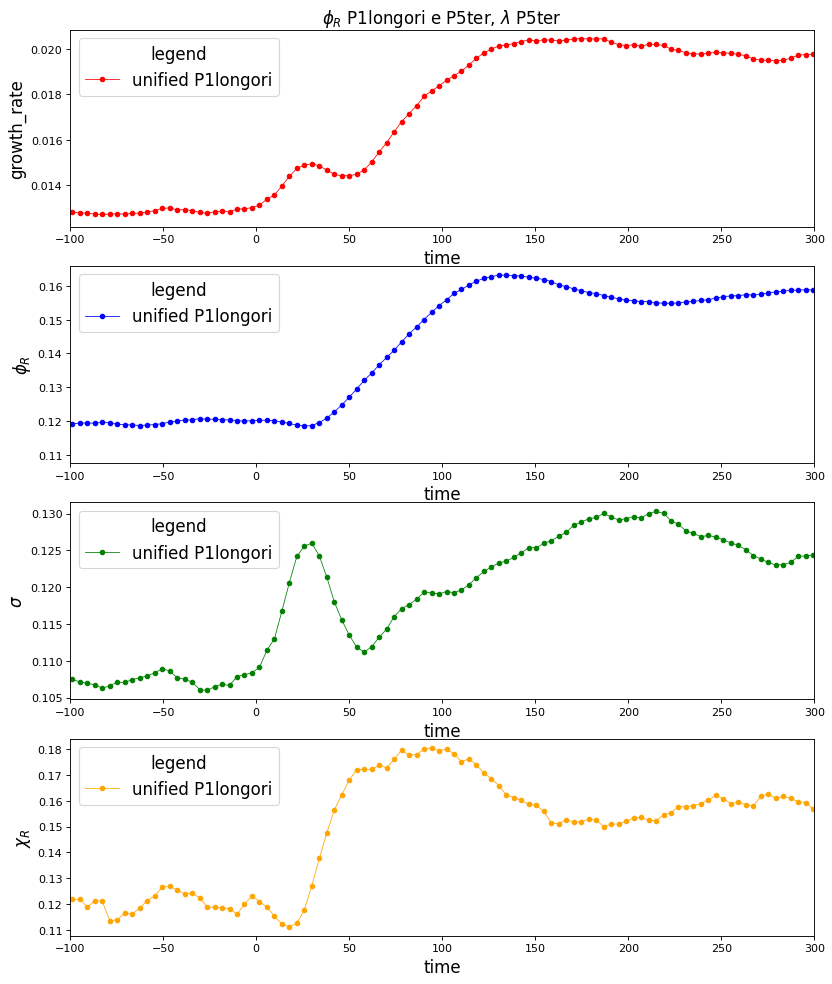

In [31]:
fig=plt.figure(num=None, figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3= fig.add_subplot(4,1,3)
ax4= fig.add_subplot(4,1,4)

ax1.set_title('$\phi_R$ P1longori e P5ter, $\lambda$ P5ter', fontsize=15)

ax1.set_xlabel("time", fontsize=15)
ax1.set_ylabel('growth_rate', fontsize=15)

ax2.set_xlabel("time", fontsize=15)
ax2.set_ylabel('$\phi_R$', fontsize=15)

ax3.set_xlabel("time", fontsize=15)
ax3.set_ylabel('$\sigma$', fontsize=15)

ax4.set_xlabel("time", fontsize=15)
ax4.set_ylabel('$\chi_R$', fontsize=15)

ax1.set_xlim(-100,300)
ax2.set_xlim(-100,300)
ax3.set_xlim(-100,300)
ax4.set_xlim(-100,300)


#ax1.set_ylim(0.017,0.023)

ax1.plot(np.linspace(-300,400,len(mean_df_new)),growth_mean_p5ter_u, 'ro-',markersize=4, linewidth=0.7, label= 'unified P1longori')
ax2.plot(np.linspace(-300,400,len(mean_df_new)),mean_df_new.phi_r, 'bo-',markersize=4, linewidth=0.7, label= 'unified P1longori')
ax3.plot(np.linspace(-300,400,len(mean_df_new)),mean_df_new.sigma, 'go-',markersize=4, linewidth=0.7, label= 'unified P1longori')
ax4.plot(np.linspace(-300,400,len(mean_df_new)),mean_df_new.chi_r, 'o-',color='orange',markersize=4, linewidth=0.7, label= 'unified P1longori')


ax1.legend(fontsize=15, title='legend',title_fontsize=15)
ax2.legend(fontsize=15, title='legend',title_fontsize=15)
ax3.legend(fontsize=15, title='legend',title_fontsize=15)
ax4.legend(fontsize=15, title='legend',title_fontsize=15)

plt.savefig('/home/valerio/tesi/plot_venerdi/tot2.pdf')

In [32]:
mean_df_new.to_csv(growth_path+'bin_mean_new.csv')

# PROVO AD APPLICARE LE NOSTRE EQUAZIONI AI DATI DI ERIKSON
# LASCIA PERDERE


In [30]:
eriksondf=pd.read_csv('/home/valerio/tesi/eriksondf.csv')

eriksondf['lambda']=eriksondf['lambda']/60
eriksondf['tempo']=eriksondf['tempo']*60


erikson_d_phi_r=derivata3(eriksondf.tempo,eriksondf.phi_r)

eriksondf=eriksondf.join(pd.Series(erikson_d_phi_r,name='d_phi_r'))

erikson_sigma=eriksondf['lambda']/eriksondf.phi_r

eriksondf=eriksondf.join(pd.Series(erikson_sigma,name='sigma'))

erikson_chi_r=((1/(eriksondf.sigma*eriksondf.phi_r))*eriksondf.d_phi_r)+eriksondf.phi_r

eriksondf=eriksondf.join(pd.Series(erikson_chi_r,name='chi_r'))

In [31]:
eriksondf

,tempo,lambda,phi_p_1,phi_p_2,phi_r,d_phi_r,sigma,chi_r
0,-108.056872,0.007481,0.622778,0.000000,0.089378,0.000014,0.083706,0.091252
1,-89.573460,0.007481,0.613798,0.000000,0.089378,0.000018,0.083706,0.091849
2,-75.355450,0.007556,0.617977,0.000000,0.090155,0.000016,0.083806,0.092299
3,-61.137441,0.007556,0.617748,0.000000,0.090155,0.000005,0.083806,0.090836
4,-45.497630,0.007556,0.617519,0.000000,0.090155,0.000010,0.083806,0.091468
5,-29.857820,0.007556,0.617311,0.000000,0.090155,-0.000005,0.083806,0.089465
6,-15.639810,0.007556,0.617083,0.000000,0.090933,-0.000002,0.083090,0.090703
7,0.000000,0.007556,0.616854,0.002827,0.088601,0.000115,0.085276,0.103874
8,15.639810,0.010370,0.590330,0.050845,0.092487,0.000275,0.112128,0.118963
9,29.857820,0.011407,0.533083,0.076953,0.097927,0.000343,0.116488,0.128009


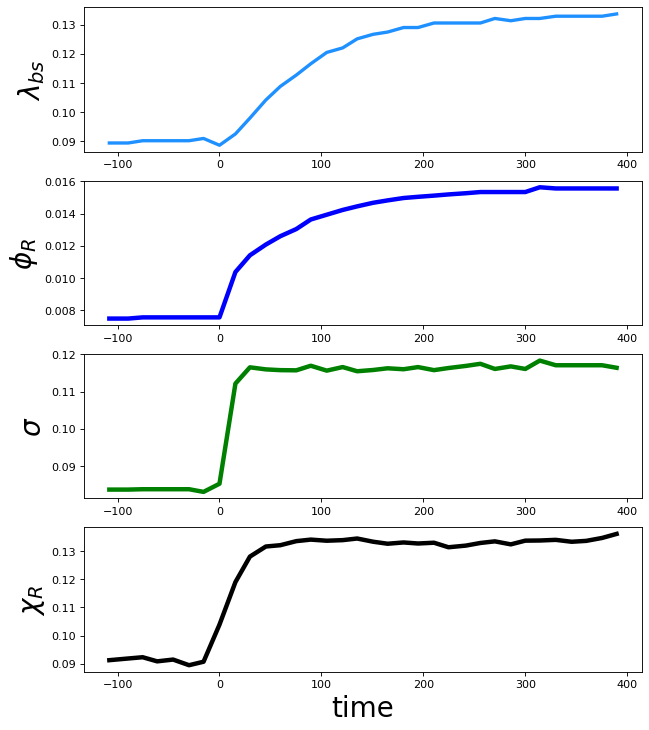

In [32]:
fig=plt.figure(num=None, figsize=(9, 11), dpi=80, facecolor='w', edgecolor='k')


ax1= fig.add_subplot(4,1,1)
#ax1.set_xlim(-100,300)
ax2 = fig.add_subplot(4,1,2,sharex=ax1)
ax3= fig.add_subplot(4,1,3,sharex=ax1)
ax4= fig.add_subplot(4,1,4,sharex=ax1)


#ax1.set_xlabel("time", fontsize=15)
ax1.set_ylabel('$\lambda_{bs}$', fontsize=25)

#ax2.set_xlabel("time", fontsize=15)
ax2.set_ylabel('$\phi_R$', fontsize=25)

#ax3.set_xlabel("time", fontsize=15)
ax3.set_ylabel('$\sigma$', fontsize=25)

ax4.set_xlabel("time", fontsize=25)
ax4.set_ylabel('$\chi_R$', fontsize=25)


ax1.plot(eriksondf.tempo,eriksondf.phi_r, color='dodgerblue', linewidth=3)

ax2.plot(eriksondf.tempo, eriksondf['lambda'],color='blue', linewidth=4)

ax3.plot(eriksondf.tempo, eriksondf.sigma,color='green', linewidth=4)

ax4.plot(eriksondf.tempo, eriksondf.chi_r,color='black', linewidth=4)





In [33]:
#eriksondf

Text(200, 0.1, '$\\chi_R$')

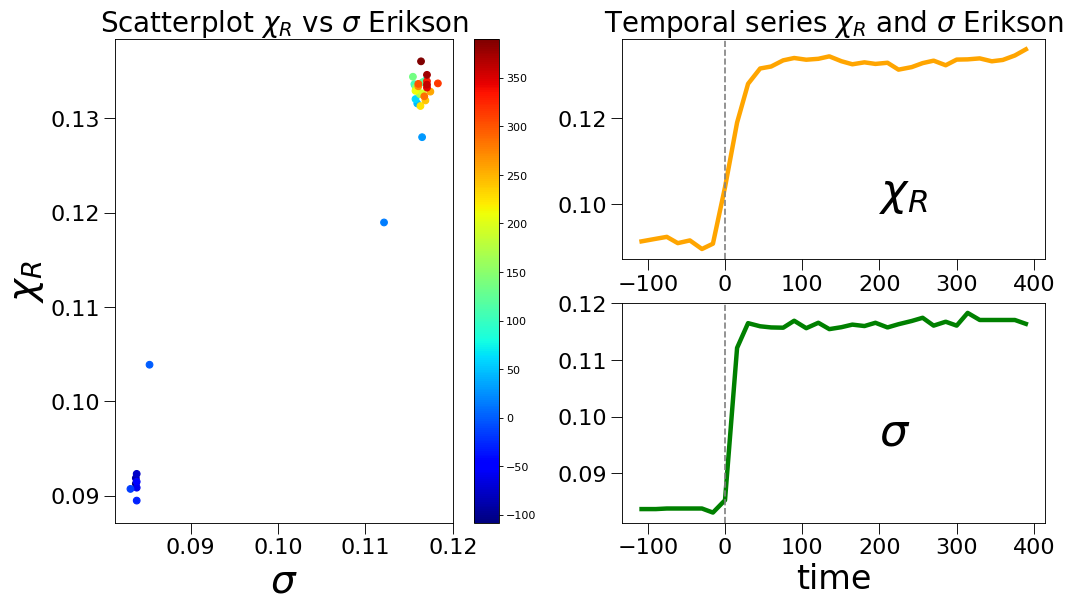

In [34]:

fig10=plt.figure(num=None, figsize=(15,8), dpi=80, facecolor='w', edgecolor='k')
gs1=fig10.add_gridspec(2,2)
ax1=fig10.add_subplot(gs1[:,0])
ax2=fig10.add_subplot(gs1[0,1])
ax3=fig10.add_subplot(gs1[1,1])

ax1.tick_params(which='major', length=10, labelsize=20)
ax2.tick_params(which='major', length=10, labelsize=20)
ax3.tick_params(which='major', length=10, labelsize=20)

ax1.set_title('Scatterplot $\chi_R$ vs $\sigma$ Erikson', fontsize=25)
ax2.set_title('Temporal series $\chi_R$ and $\sigma$ Erikson', fontsize=25)

cm= plt.cm.get_cmap('jet')


#ax2.set_xlim(-100,300)

ax3.set_xlabel("time", fontsize=30)
ax1.set_xlabel('$\sigma$', fontsize=35)
ax1.set_ylabel('$\chi_R$', fontsize=35)

ax3.plot(eriksondf.tempo,eriksondf.sigma, 'g-', linewidth=4)
ax2.plot(eriksondf.tempo,eriksondf.chi_r, '-',color='orange', linewidth=4)
#ax1.plot(eriksondf.sigma,eriksondf.chi_r, '-',color='orange', linewidth=4)

sc=ax1.scatter(eriksondf.sigma, eriksondf.chi_r,c=eriksondf.tempo, cmap='jet')
plt.colorbar(sc,ax=ax1, ticks=np.linspace(-100,400,11))

ax3.axvline(x=0, linestyle='--', color='grey')
ax2.axvline(x=0, linestyle='--', color='grey')

ax3.text(200,0.0950,'$\sigma$', fontsize=40)
ax2.text(200,0.1,'$\chi_R$', fontsize=40)

In [35]:
eriksondf2=pd.read_csv('/home/valerio/tesi/eriksonproxy.csv')



#erikson2_proxy_r=derivata_sg(eriksondf2.mass_rna,eriksondf2.rna)
#erikson2_proxy_p=derivata_sg(eriksondf2.mass_placz,eriksondf2.placz)

eriksondf2_proxy_r=(eriksondf2.rna/eriksondf2.mass_rna)
eriksondf2_proxy_p=(eriksondf2.placz/eriksondf2.mass_placz)


eriksondf2=eriksondf2.join(pd.Series(eriksondf2_proxy_r,name='proxy_r'))
eriksondf2=eriksondf2.join(pd.Series(eriksondf2_proxy_p,name='proxy_p'))

#erikson_sigma=eriksondf['lambda']/eriksondf.phi_r

#eriksondf=eriksondf.join(pd.Series(erikson_sigma,name='sigma'))

#erikson_chi_r=((1/(eriksondf.sigma*eriksondf.phi_r))*eriksondf.d_phi_r)+eriksondf.phi_r

#eriksondf=eriksondf.join(pd.Series(erikson_chi_r,name='chi_r'))

In [36]:
fluo_params_e,pcov_e=scipy.optimize.curve_fit(fit_func_fluo, eriksondf2.proxy_p, eriksondf2.proxy_r )
fluo_params_e

array([0.00752409, 0.01274839])

In [37]:
eriksondf2_phi_r=fluo_params_e[0]*eriksondf2.proxy_r
eriksondf2_phi_p=fluo_params_e[1]*eriksondf2.proxy_p

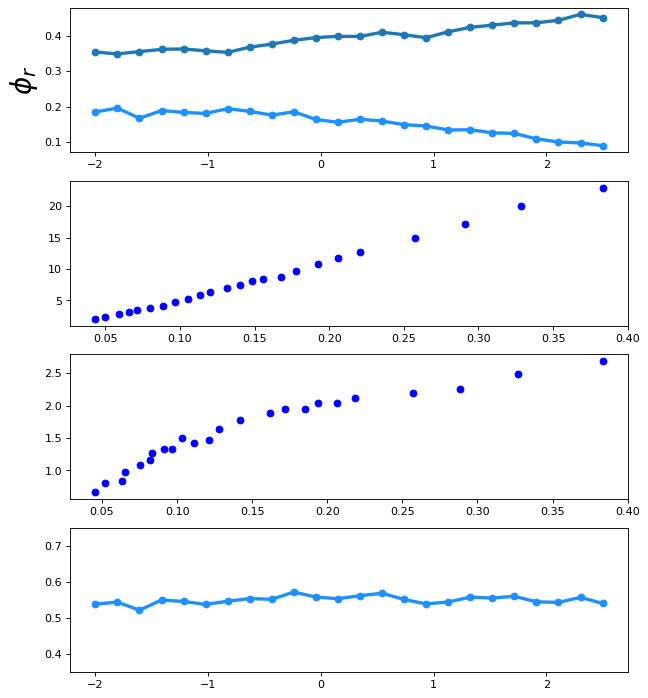

In [38]:
fig=plt.figure(num=None, figsize=(9, 11), dpi=80, facecolor='w', edgecolor='k')


ax1= fig.add_subplot(4,1,1)
#ax1.set_xlim(-100,300)
ax2 = fig.add_subplot(4,1,2)
ax3= fig.add_subplot(4,1,3)
ax4= fig.add_subplot(4,1,4)
ax4.set_ylim(0.35,0.75)

#ax1.set_xlabel("time", fontsize=15)
ax1.set_ylabel('$\phi_r$', fontsize=25)

#ax2.set_xlabel("time", fontsize=15)
#ax2.set_ylabel('$\phi_R$', fontsize=25)

#ax3.set_xlabel("time", fontsize=15)
#ax3.set_ylabel('$\sigma$', fontsize=25)

#ax4.set_xlabel("time", fontsize=25)
#ax4.set_ylabel('$\chi_R$', fontsize=25)


ax1.plot(np.linspace(-2,2.5,len(eriksondf2_phi_r)),eriksondf2_phi_r,'o-',  linewidth=3)
ax1.plot(np.linspace(-2,2.5,len(eriksondf2_phi_r)),eriksondf2_phi_p,'o-', color='dodgerblue', linewidth=3)
ax4.plot(np.linspace(-2,2.5,len(eriksondf2_phi_r)),eriksondf2_phi_p+eriksondf2_phi_r,'o-', color='dodgerblue', linewidth=3)


ax2.plot(eriksondf2.mass_rna, eriksondf2.rna,'o',color='blue', linewidth=4)
ax3.plot(eriksondf2.mass_placz, eriksondf2.placz,'o',color='blue', linewidth=4)

#ax3.plot(eriksondf.tempo, eriksondf.sigma,color='green', linewidth=4)

#ax4.plot(eriksondf.tempo, eriksondf.chi_r,color='black', linewidth=4)



